# **ML Tweets Classification**

In [16]:
import pandas as pd
import spacy 
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text  import CountVectorizer
from sklearn.linear_model import LogisticRegression 

# Data Preprocessing and EDA

In [2]:
train_data = pd.read_csv('/kaggle/input/deeptweets/train.csv')
test_data = pd.read_csv('/kaggle/input/deeptweets/test.csv')

In [3]:
train_data.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [4]:
test_data.head()

,TweetId,TweetText
0,306486520121012224,'28. The home side threaten again through Maso...
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....
2,289531046037438464,'@Sochi2014 construction along the shores of t...
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...


In [5]:
print("Training data shape:",train_data.shape)
print("Testing data shape:",test_data.shape)

Training data shape: (6525, 3)
Testing data shape: (2610, 2)


In [6]:
train_data['Label'].value_counts()

Label
Sports      3325
Politics    3200
Name: count, dtype: int64

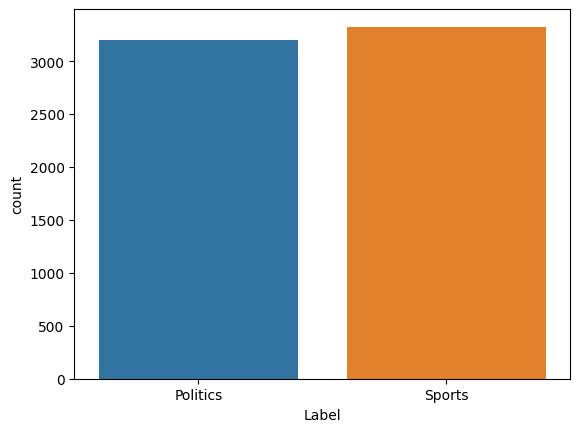

In [37]:
# Comparison of the labels
sns.countplot(x='Label', data=train_data)
plt.show()

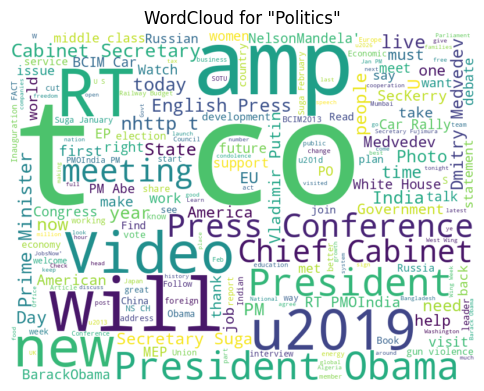

In [7]:
# Visualize word cloud for "politics"
politics = train_data[train_data['Label'] == 'Politics']['TweetText'].values


wcp = WordCloud(width=800, height=600, background_color='white').generate(' '.join(politics))
plt.figure(figsize=(6, 6))
plt.imshow(wcp, interpolation='bilinear')
plt.title('WordCloud for "Politics"')
plt.axis('off')
plt.show()

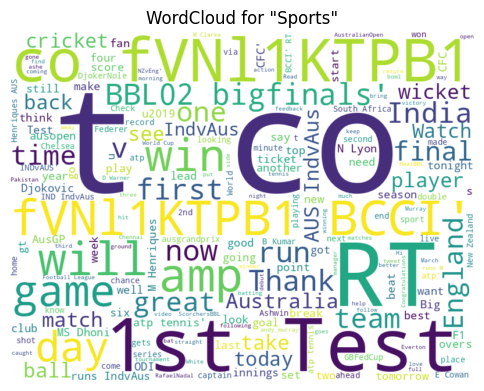

In [8]:
# Visualize word cloud for "sports"
sports = train_data[train_data['Label'] == 'Sports']['TweetText'].values

wcs = WordCloud(width=800, height=600, background_color='white').generate(' '.join(sports))
plt.figure(figsize=(6, 6))
plt.imshow(wcs, interpolation='bilinear')
plt.title('WordCloud for "Sports"')
plt.axis('off')
plt.show()


In [9]:
# Initialization of the stemmer
stemmer = PorterStemmer()

def Text_Processing(text):
    text = text.lower()
    # Remove special characters and URLs
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    # Tokenize the text
    text = word_tokenize(text)
    # Stemming words
    text = [stemmer.stem(word) for word in text]
    # Join the processed words back into a sentence
    text = ' '.join(text)
    return text

In [10]:
# Apply preprocessing to each tweet in the dataset
train_data['ProcessedText'] = train_data['TweetText'].apply(Text_Processing)
test_data['TweetText'] = test_data['TweetText'].apply(Text_Processing)

In [11]:
train_data.head()

,TweetId,Label,TweetText,ProcessedText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,seckerri the valu of the statedept and usaid i...
1,304834304222064640,Politics,'@rraina1481 I fear so',rraina i fear so
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,watch video highlight of the wwc final between...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,rt chelscanlan at nitro circu at albertpark th...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,cricketfox alway a good thing thank for the fe...


In [12]:
X = train_data['ProcessedText']
y = train_data['Label']

In [13]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Model Training

## Logistic Regression

In [14]:
LR = Pipeline([
    ('bag_of_word' , CountVectorizer(ngram_range=(1,2))),
    ('LR' , LogisticRegression())
    
])
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Politics       0.96      0.92      0.94       638
      Sports       0.92      0.96      0.94       667

    accuracy                           0.94      1305
   macro avg       0.94      0.94      0.94      1305
weighted avg       0.94      0.94      0.94      1305



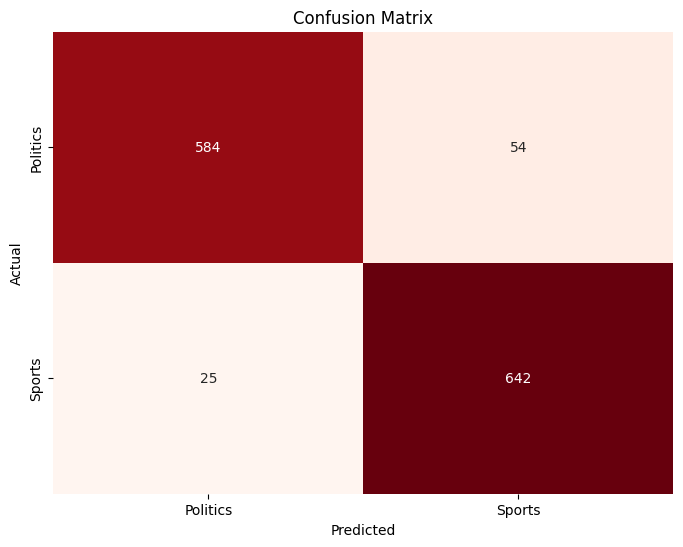

In [18]:
# Confusion matrix
cfm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cfm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=LR.classes_, yticklabels=LR.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Submission

In [19]:
test_data.head()

,TweetId,TweetText
0,306486520121012224,the home side threaten again through mason ben...
1,286353402605228032,mrbrown aulia thx for ask see it deriv from a ...
2,289531046037438464,sochi construct along the shore of the black sea
3,306451661403062273,seckerryu remark after meet with foreign minis...
4,297941800658812928,the iplauct ha begun ricki pont is the first p...


In [24]:
test_pred = LR.predict(test_data['TweetText'])
test_pred

array(['Sports', 'Politics', 'Politics', ..., 'Sports', 'Politics',
       'Politics'], dtype=object)

In [26]:
sub_df = pd.DataFrame({'TweetId': test_data['TweetId'], 'Label': test_pred})
sub_df

,TweetId,Label
0,306486520121012224,Sports
1,286353402605228032,Politics
2,289531046037438464,Politics
3,306451661403062273,Politics
4,297941800658812928,Politics
...,...,...
2605,282023761044189184,Sports
2606,303879735006601216,Politics
2607,297956846046703616,Sports
2608,304265049537658880,Politics


In [27]:
sub_df.to_csv('Final_Submission.csv', index=False)